In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 df = pd.read_csv('WeeklyChartsDataFrame.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4985 non-null   int64  
 1   Rank           4985 non-null   int64  
 2   LW             4985 non-null   object 
 3   Release        4985 non-null   object 
 4   Gross          4985 non-null   object 
 5   %± LW          4985 non-null   object 
 6   Theaters       4985 non-null   object 
 7   Change         4985 non-null   object 
 8   Average        4985 non-null   object 
 9   Total Gross    4985 non-null   object 
 10  Weeks          4985 non-null   object 
 11  Distributor    4971 non-null   object 
 12  New This Week  4985 non-null   object 
 13  Estimated      4985 non-null   bool   
 14  YRWK           4985 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 550.2+ KB


In [4]:
df.dtypes

Unnamed: 0         int64
Rank               int64
LW                object
Release           object
Gross             object
%± LW             object
Theaters          object
Change            object
Average           object
Total Gross       object
Weeks             object
Distributor       object
New This Week     object
Estimated           bool
YRWK             float64
dtype: object

In [5]:
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

##Check dataframe info




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4985 non-null   int64  
 1   LW             4985 non-null   object 
 2   Release        4985 non-null   object 
 3   Gross          4985 non-null   object 
 4   %± LW          4985 non-null   object 
 5   Theaters       4985 non-null   object 
 6   Change         4985 non-null   object 
 7   Average        4985 non-null   object 
 8   Total Gross    4985 non-null   object 
 9   Weeks          4985 non-null   object 
 10  Distributor    4971 non-null   object 
 11  New This Week  4985 non-null   object 
 12  Estimated      4985 non-null   bool   
 13  YRWK           4985 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 511.3+ KB


Here we see that most of our dataframe[col] are of type object. We want to be able to evaluate as much data as possible so we must change these to something more convenient. Let's investigate each column.

In [7]:
df.head()

,Rank,LW,Release,Gross,%± LW,Theaters,Change,Average,Total Gross,Weeks,Distributor,New This Week,Estimated,YRWK
0,1,1,Star Wars: Episode IX - The Rise of Skywalker,"$46,053,249",-63.8%,4406,-,"$10,452","$463,110,690",3,Walt Disney Studios Motion Pictures,False,False,2020.01
1,2,2,Jumanji: The Next Level,"$33,418,576",-51.9%,4134,-93,"$8,083","$243,124,981",4,Sony Pictures Entertainment (SPE),False,False,2020.01
2,3,3,Little Women,"$19,932,677",-41.4%,3308,-,"$6,025","$66,381,009",3,Sony Pictures Entertainment (SPE),False,False,2020.01
3,4,4,Frozen II,"$15,037,678",-55.5%,3175,-90,"$4,736","$453,623,042",7,Walt Disney Studios Motion Pictures,False,False,2020.01
4,5,-,The Grudge,"$14,406,715",-,2642,-,"$5,452","$14,406,715",1,Sony Pictures Entertainment (SPE),True,False,2020.01


##We'll start simply
The easiest columns appear to be:<br>
1.   LW, Theaters, Weeks -> int
2.   New This Week -> bool

We'll need to do cleaning on Gross, +- LW, AVG, Total Gross, so we'll handle those later.

First we'll need to look for rows where these columns don't appear to follow a proper integer format. 

In [8]:
col_list = ['LW', 'Theaters', 'Weeks']
new_df = df[col_list]
df[:] = np.where(df.eq('-'), 0, df)
# ser = df['LW']
# mask = df['LW'].str.match('\D')
# new_df.LW[mask] = 0
# new_df.LW.astype('int32')
# new_df

In [9]:
df.Change = df.Change.astype('int')

In [10]:
df = df.astype({'LW':'int32', 'Theaters':'int32', 'Weeks':'int32'})

In [11]:
df[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   LW        4985 non-null   int32
 1   Theaters  4985 non-null   int32
 2   Weeks     4985 non-null   int32
dtypes: int32(3)
memory usage: 58.5 KB


In [12]:
df.head()

,Rank,LW,Release,Gross,%± LW,Theaters,Change,Average,Total Gross,Weeks,Distributor,New This Week,Estimated,YRWK
0,1,1,Star Wars: Episode IX - The Rise of Skywalker,"$46,053,249",-63.8%,4406,0,"$10,452","$463,110,690",3,Walt Disney Studios Motion Pictures,False,False,2020.01
1,2,2,Jumanji: The Next Level,"$33,418,576",-51.9%,4134,-93,"$8,083","$243,124,981",4,Sony Pictures Entertainment (SPE),False,False,2020.01
2,3,3,Little Women,"$19,932,677",-41.4%,3308,0,"$6,025","$66,381,009",3,Sony Pictures Entertainment (SPE),False,False,2020.01
3,4,4,Frozen II,"$15,037,678",-55.5%,3175,-90,"$4,736","$453,623,042",7,Walt Disney Studios Motion Pictures,False,False,2020.01
4,5,0,The Grudge,"$14,406,715",0,2642,0,"$5,452","$14,406,715",1,Sony Pictures Entertainment (SPE),True,False,2020.01


In [13]:
df = df.astype({'New This Week':'bool'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4985 non-null   int64  
 1   LW             4985 non-null   int32  
 2   Release        4985 non-null   object 
 3   Gross          4985 non-null   object 
 4   %± LW          4985 non-null   object 
 5   Theaters       4985 non-null   int32  
 6   Change         4985 non-null   int64  
 7   Average        4985 non-null   object 
 8   Total Gross    4985 non-null   object 
 9   Weeks          4985 non-null   int32  
 10  Distributor    4971 non-null   object 
 11  New This Week  4985 non-null   bool   
 12  Estimated      4985 non-null   bool   
 13  YRWK           4985 non-null   float64
dtypes: bool(2), float64(1), int32(3), int64(2), object(6)
memory usage: 418.8+ KB


#Lets fix the YRWK and see if we can turn it into a proper datetime. 


*   We only have a year and a week reference.
*   Each week starts on a friday. So 2020.01 corresponds to 01/03/20 -> 01/09/20



In [15]:
print(df[['Release', 'YRWK']].head())
print(df[['Release', 'YRWK']].info())

                                         Release     YRWK
0  Star Wars: Episode IX - The Rise of Skywalker  2020.01
1                        Jumanji: The Next Level  2020.01
2                                   Little Women  2020.01
3                                      Frozen II  2020.01
4                                     The Grudge  2020.01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Release  4985 non-null   object 
 1   YRWK     4985 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.0+ KB
None


In [16]:
import datetime

In [17]:
#in the following, we run pd.to_datetiume. Since our Series is of floats, we use
# .astype to apply a lambda with a string replace, we add a string of '0' to
# comply with the datetime requirement of a year and day. We then specify the 
# format using the sunday week.
df['YRWK_date'] = pd.to_datetime(df['YRWK'].astype(str).apply(
    lambda x: x.replace('.', '/') +'0'), format='%Y/%U%w')
# We adjust the datetime using a timedelta, as our weeks start on friday
df['YRWK_date'] = df['YRWK_date'] - datetime.timedelta(days=2)
# We were unable to add the day as 5 in the string because in this dataset
# the week 01 starts on a Friday. %U is starting sunday.
# Since 2020 starts on a Wednesday we need to use a timedelta.

In [18]:
df['YRWK_date'].head(10)

0   2020-01-03
1   2020-01-03
2   2020-01-03
3   2020-01-03
4   2020-01-03
5   2020-01-03
6   2020-01-03
7   2020-01-03
8   2020-01-03
9   2020-01-03
Name: YRWK_date, dtype: datetime64[ns]

#Now the not as easy stuff

It looks like we can divide them into two groups:
*   Gross
*   Average
*   Total Gross<br>
and:
*   %+ LW





In [19]:
col_dict = {'Gross':'int32', 'Average':'int32', 'Total Gross':'int32'}
new_df = df[list(col_dict.keys())]
new_df.head()

,Gross,Average,Total Gross
0,"$46,053,249","$10,452","$463,110,690"
1,"$33,418,576","$8,083","$243,124,981"
2,"$19,932,677","$6,025","$66,381,009"
3,"$15,037,678","$4,736","$453,623,042"
4,"$14,406,715","$5,452","$14,406,715"


In [20]:
df.Gross = df.Gross.str.replace(re.compile('\D'), '').astype('int32')
df['Total Gross'] = df['Total Gross'].str.replace(re.compile('\D'), '').astype('int32')

In [21]:
df[['Gross', 'Total Gross']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gross        4985 non-null   int32
 1   Total Gross  4985 non-null   int32
dtypes: int32(2)
memory usage: 39.1 KB


In [22]:
df.Average = df.Average.str.replace(re.compile('\D'), '').astype('float64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rank           4985 non-null   int64         
 1   LW             4985 non-null   int32         
 2   Release        4985 non-null   object        
 3   Gross          4985 non-null   int32         
 4   %± LW          4985 non-null   object        
 5   Theaters       4985 non-null   int32         
 6   Change         4985 non-null   int64         
 7   Average        4956 non-null   float64       
 8   Total Gross    4985 non-null   int32         
 9   Weeks          4985 non-null   int32         
 10  Distributor    4971 non-null   object        
 11  New This Week  4985 non-null   bool          
 12  Estimated      4985 non-null   bool          
 13  YRWK           4985 non-null   float64       
 14  YRWK_date      4985 non-null   datetime64[ns]
dtypes: bool(2), datetime6

In [24]:
%matplotlib inline
import seaborn as sns

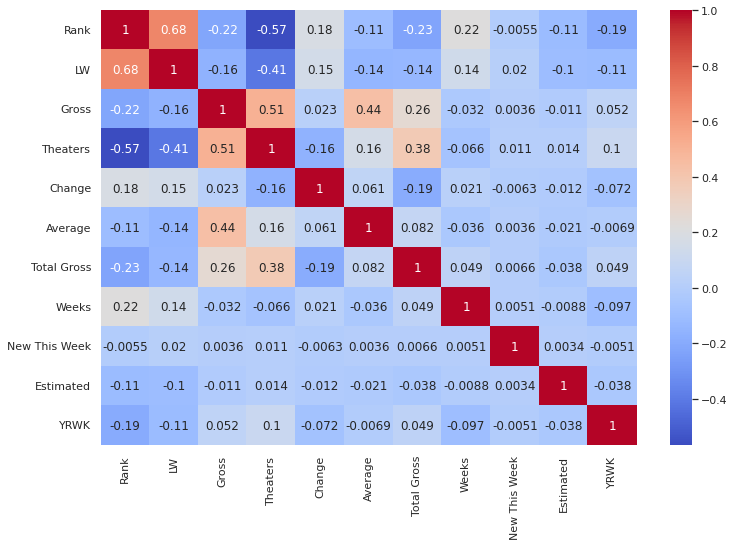

In [25]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


# <del>Now lets handle movie performance</del>
# Handling terrible data




In [26]:
df_2 = pd.read_csv('movie_performance.csv')

In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   906 non-null    object 
 1   Budget       80 non-null     float64
 2   MPAA         906 non-null    object 
 3   Genre        906 non-null    object 
 4   D.Gross      887 non-null    float64
 5   I.Gross      617 non-null    float64
 6   Total Gross  906 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 49.7+ KB


In [28]:
df_2.head()

,Unnamed: 0,Budget,MPAA,Genre,D.Gross,I.Gross,Total Gross
0,Star Wars: Episode IX - The Rise of Skywalker,275000000.0,PG-13,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",515202542.0,558941706.0,1074144248
1,Jumanji: The Next Level,125000000.0,PG-13,"['Action', 'Adventure', 'Comedy', 'Fantasy']",320314960.0,479744747.0,800059707
2,Little Women,40000000.0,PG,"['Drama', 'Romance']",108101214.0,108500000.0,216601214
3,Frozen II,150000000.0,PG,"['Adventure', 'Animation', 'Comedy', 'Family',...",477373578.0,972653355.0,1450026933
4,The Grudge,10000000.0,R,"['Fantasy', 'Horror']",21221803.0,28289516.0,49511319


In [64]:
df_2.rename(columns={'Unnamed: 0': 'Title'}, inplace=True)

##Alright, we still need more. I want MPAA and Genre to both be analyzable. So let's factorize the columns. 

In [30]:
df_2[['MPAA','Genre']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MPAA    906 non-null    object
 1   Genre   906 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


Object columns can be strings, lists, etc. So lets look further

In [31]:
for i in df_2['MPAA'].sample(10):
  print(type(i))
df_2['MPAA'].unique()

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


array(['PG-13', 'PG', 'R', 'NR', 'G'], dtype=object)

Given the low number of unique values, and our easy understanding of the values, we'll handle MPAA with a dictionary

In [32]:
MPAA_dict = {'NR': 0, 'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4}
df_2['MPAA_Factor'] = df_2['MPAA'].apply(lambda x: MPAA_dict[x])

In [33]:
df_2.head()

,Unnamed: 0,Budget,MPAA,Genre,D.Gross,I.Gross,Total Gross,MPAA_Factor
0,Star Wars: Episode IX - The Rise of Skywalker,275000000.0,PG-13,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",515202542.0,558941706.0,1074144248,3
1,Jumanji: The Next Level,125000000.0,PG-13,"['Action', 'Adventure', 'Comedy', 'Fantasy']",320314960.0,479744747.0,800059707,3
2,Little Women,40000000.0,PG,"['Drama', 'Romance']",108101214.0,108500000.0,216601214,2
3,Frozen II,150000000.0,PG,"['Adventure', 'Animation', 'Comedy', 'Family',...",477373578.0,972653355.0,1450026933,2
4,The Grudge,10000000.0,R,"['Fantasy', 'Horror']",21221803.0,28289516.0,49511319,4


#Below, we see something I didn't expect
As MPAA factor decreases, budget increases. Does this... make sense? Maybe, there are alot of animated kid shows... but I'm not entirely convinced. We have alot of NaN values. Let's look carefully.

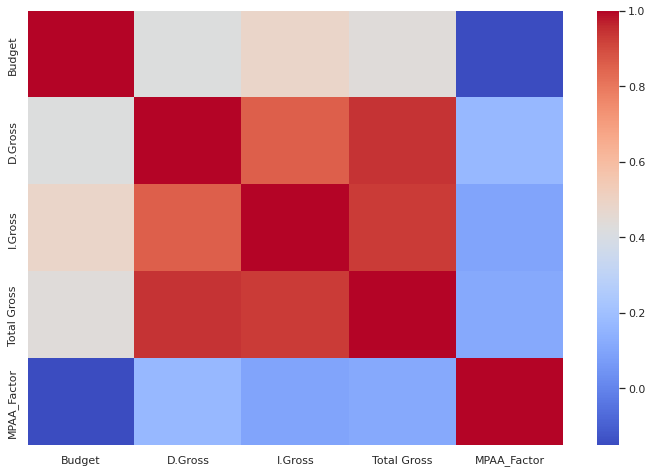

In [34]:
sns.heatmap(df_2.corr(), cmap='coolwarm')

In [35]:
df_2.sample(25)

,Unnamed: 0,Budget,MPAA,Genre,D.Gross,I.Gross,Total Gross,MPAA_Factor
106,The Hottest August,NaN,NR,['Documentary'],9163.0,NaN,9163,0
206,"14 Days, 12 Nights",NaN,NR,['Drama'],122530.0,276.0,122806,0
881,Sonic the Hedgehog 2,NaN,PG,"['Action', 'Adventure', 'Comedy', 'Family', 'F...",170482232.0,179500000.0,349982232,2
572,Our Ladies,NaN,R,"['Comedy', 'Drama']",27558.0,541511.0,569069,4
468,Boogie,NaN,R,"['Drama', 'Sport']",4178620.0,12403.0,4191023,4
65,The Woman Who Loves Giraffes,NaN,NR,['Documentary'],113858.0,NaN,113858,0
69,A Bigger Splash,NaN,NR,"['Biography', 'Documentary', 'Drama']",95826.0,NaN,95826,0
128,The Assistant,NaN,R,['Drama'],1100313.0,238568.0,1338881,4
848,Tyson's Run,NaN,PG,['Drama'],391426.0,NaN,391426,2
184,Premature,NaN,NR,"['Drama', 'Music', 'Romance']",23071.0,NaN,23071,0


##Looking over the data again alot of this is very clearly wrong.
We see alot of big blockbuster movies that definitely *were* rated. They look like rereleases though. So, great it appears we've identified what was wrong with our scraper. In the meantime, what meaningful data can be analyzed I wonder.<br><br>

Budget and Rating have sadly become almost useless to us. It would be dangerous to draw any conclusions with so much data missing. We'll drop these columns for now.

In [36]:
df_2.drop(labels=['Budget', 'MPAA', 'MPAA_Factor'], axis=1)

,Unnamed: 0,Genre,D.Gross,I.Gross,Total Gross
0,Star Wars: Episode IX - The Rise of Skywalker,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",515202542.0,558941706.0,1074144248
1,Jumanji: The Next Level,"['Action', 'Adventure', 'Comedy', 'Fantasy']",320314960.0,479744747.0,800059707
2,Little Women,"['Drama', 'Romance']",108101214.0,108500000.0,216601214
3,Frozen II,"['Adventure', 'Animation', 'Comedy', 'Family',...",477373578.0,972653355.0,1450026933
4,The Grudge,"['Fantasy', 'Horror']",21221803.0,28289516.0,49511319
...,...,...,...,...,...
901,Unplugging,"['Comedy', 'Romance']",20500.0,13795.0,34295
902,Charlotte,['Animation'],17419.0,NaN,17419
903,Hit the Road,['Drama'],74609.0,303877.0,378486
904,Take Me to the River: New Orleans,['Documentary'],13619.0,NaN,13619


#Genres
Lets turn Genre into an actual list, we can then factorize the list for data which can be visualized. To transform a string into a list, we will use the ast library.

In [37]:
import ast

In [38]:
for i in df_2['Genre'].sample(20):
  print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [39]:
mask = df_2['Genre'] == 'attrerror'
df_2.drop(df_2[mask].index, inplace = True)

In [40]:
df_2.sort_values('Genre',ascending=True).tail(10)

,Unnamed: 0,Budget,MPAA,Genre,D.Gross,I.Gross,Total Gross,MPAA_Factor
130,Incitement,NaN,NR,['Thriller'],140306.0,2853.0,143159,0
268,What We Found,NaN,NR,['Thriller'],6976.0,NaN,6976,0
880,Barbarians,NaN,NR,['Thriller'],10742.0,NaN,10742,0
379,Always and Forever,NaN,PG-13,['Thriller'],197464.0,104871.0,302335,3
101,Lore,NaN,NR,['Thriller'],20006.0,NaN,20006,0
459,Abandoned: Angelique's Isle,NaN,NR,['Thriller'],6055.0,NaN,6055,0
399,Fatale,NaN,R,['Thriller'],6306897.0,724392.0,7031289,4
844,Huda's Salon,NaN,R,['Thriller'],16128.0,5948.0,22076,4
359,True to the Game 2,NaN,R,['Thriller'],1181823.0,NaN,1181823,4
68,Sympathy for the Devil,NaN,NR,['War'],51150.0,63151.0,114301,0


In [41]:
(df_2['Genre'][1])

"['Action', 'Adventure', 'Comedy', 'Fantasy']"

We'll use the ast library for quickly converting the Genre string to a list, since it is a string with a list format

In [42]:
df_2['Genre'] = df_2['Genre'].apply(ast.literal_eval)

In [43]:
for i in df_2['Genre'].sample(20):
  print(type(i))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [44]:
df_2['Genre'].apply(pd.Series.factorize)

0      ([0, 1, 2, 3], [Action, Adventure, Fantasy, Sc...
1      ([0, 1, 2, 3], [Action, Adventure, Comedy, Fan...
2                             ([0, 1], [Drama, Romance])
3      ([0, 1, 2, 3, 4, 5], [Adventure, Animation, Co...
4                            ([0, 1], [Fantasy, Horror])
                             ...                        
901                          ([0, 1], [Comedy, Romance])
902                                   ([0], [Animation])
903                                       ([0], [Drama])
904                                 ([0], [Documentary])
905                                      ([0], [Comedy])
Name: Genre, Length: 900, dtype: object

In [45]:
df_2

,Unnamed: 0,Budget,MPAA,Genre,D.Gross,I.Gross,Total Gross,MPAA_Factor
0,Star Wars: Episode IX - The Rise of Skywalker,275000000.0,PG-13,"[Action, Adventure, Fantasy, Sci-Fi]",515202542.0,558941706.0,1074144248,3
1,Jumanji: The Next Level,125000000.0,PG-13,"[Action, Adventure, Comedy, Fantasy]",320314960.0,479744747.0,800059707,3
2,Little Women,40000000.0,PG,"[Drama, Romance]",108101214.0,108500000.0,216601214,2
3,Frozen II,150000000.0,PG,"[Adventure, Animation, Comedy, Family, Fantasy...",477373578.0,972653355.0,1450026933,2
4,The Grudge,10000000.0,R,"[Fantasy, Horror]",21221803.0,28289516.0,49511319,4
...,...,...,...,...,...,...,...,...
901,Unplugging,NaN,R,"[Comedy, Romance]",20500.0,13795.0,34295,4
902,Charlotte,NaN,NR,[Animation],17419.0,NaN,17419,0
903,Hit the Road,NaN,NR,[Drama],74609.0,303877.0,378486,0
904,Take Me to the River: New Orleans,NaN,NR,[Documentary],13619.0,NaN,13619,0


#Converting Genre into something more navigable
Now that we have a list, we can factorize it to make something more digestible for the computer. We can't simply run .factorize() however, as each title will be treated as a new factorization, resetting it's index. <br><br>



In [59]:
s = set(item for sublist in df_2.Genre for item in sublist)
s = {k: n for n, k in enumerate(sorted(list(s)))}

In [62]:
df_2['Genre_Factor'] = [[s[key] for key in sublist] for sublist in df_2.Genre]

In [65]:
df_2

,Title,Budget,MPAA,Genre,D.Gross,I.Gross,Total Gross,MPAA_Factor,Genre_Factor
0,Star Wars: Episode IX - The Rise of Skywalker,275000000.0,PG-13,"[Action, Adventure, Fantasy, Sci-Fi]",515202542.0,558941706.0,1074144248,3,"[0, 1, 9, 17]"
1,Jumanji: The Next Level,125000000.0,PG-13,"[Action, Adventure, Comedy, Fantasy]",320314960.0,479744747.0,800059707,3,"[0, 1, 4, 9]"
2,Little Women,40000000.0,PG,"[Drama, Romance]",108101214.0,108500000.0,216601214,2,"[7, 16]"
3,Frozen II,150000000.0,PG,"[Adventure, Animation, Comedy, Family, Fantasy...",477373578.0,972653355.0,1450026933,2,"[1, 2, 4, 8, 9, 13]"
4,The Grudge,10000000.0,R,"[Fantasy, Horror]",21221803.0,28289516.0,49511319,4,"[9, 11]"
...,...,...,...,...,...,...,...,...,...
901,Unplugging,NaN,R,"[Comedy, Romance]",20500.0,13795.0,34295,4,"[4, 16]"
902,Charlotte,NaN,NR,[Animation],17419.0,NaN,17419,0,[2]
903,Hit the Road,NaN,NR,[Drama],74609.0,303877.0,378486,0,[7]
904,Take Me to the River: New Orleans,NaN,NR,[Documentary],13619.0,NaN,13619,0,[6]
